<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek2/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Khairi Hibatullah Ridho_1103228240_Tugas Polynomial Regression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd #impor library pandas untuk mengelola data

file_path = '/content/drive/MyDrive/Dataset MachineLearning/EconomiesOfScale.csv' #menggunakan path google drive karena tadi diajarkan cara untuk menyambungkan google drive dengan google colab

df = pd.read_csv(file_path) #membaca file menggunakan pandas

print(df.head()) #menampilkan 5 baris pertama atau kepala dari data untuk dilihat data awalnya

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [26]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [27]:
df.info() #untuk melihat informasi dataset ini menggunakan apa saja tipe berapa kolomnya dan lainnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [28]:
df.describe() #memberikan informasi angka angka pada data nya dilihat seperti ada berapa datanya, berapa rata ratanya, dst

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [29]:
import seaborn as sns #menggunakan library seaborn dan matplotlib untuk menghasilkan data berbentuk diagram scatterplot
import matplotlib.pyplot as plt

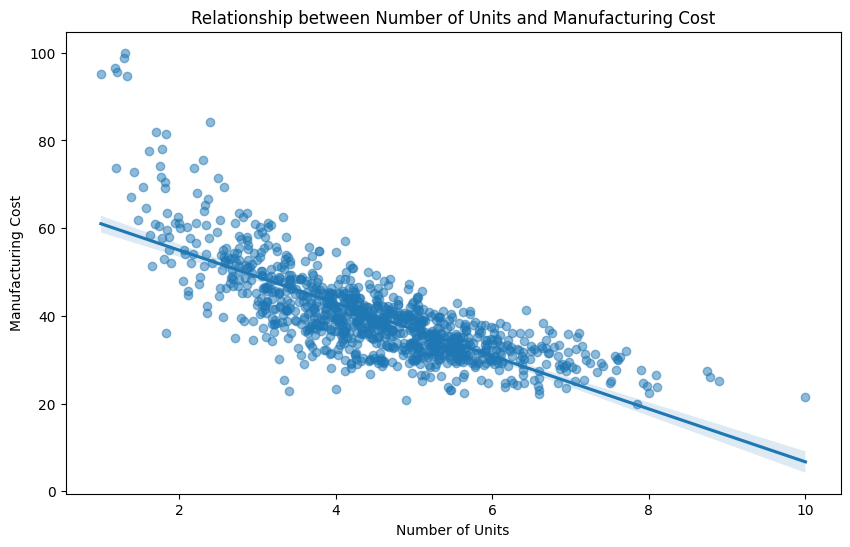

In [30]:
number_of_units = df['Number of Units'] #melakukan pembacaan data dari number of units dan manufacturing cost
manufacturing_cost = df['Manufacturing Cost']

#membuat scatter plot dengan regresi linier menggunakan Seaborn
plt.figure(figsize=(10, 6))  #menentukan ukuran plot
sns.regplot(x=number_of_units, y=manufacturing_cost, scatter_kws={'alpha':0.5})  #membuat scatter plot dengan regresi linier

#menambahkan label sumbu dan judul plot
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Relationship between Number of Units and Manufacturing Cost')

#menampilkan grafik plot nya
plt.show()

In [31]:
#kolom label y adalah 'manufacturing cost'
y = df['Manufacturing Cost']

#kolom fitur x adalah 'number of units'
x = df['Number of Units']

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
x = np.array(x).reshape(-1, 1) #mengubah array x menjadi matriks 2D dengan satu kolom
y = np.array(y) #membuat array y dari data label (target)

Degree 1: MSE = 47.22
Degree 2: MSE = 37.57
Degree 3: MSE = 35.07
Degree 4: MSE = 34.41
Degree 5: MSE = 34.08
Degree 6: MSE = 33.89
Degree 7: MSE = 33.78
Degree 8: MSE = 33.70
Degree 9: MSE = 33.61
Degree 10: MSE = 33.41
Degree 11: MSE = 33.13
Degree 12: MSE = 33.04


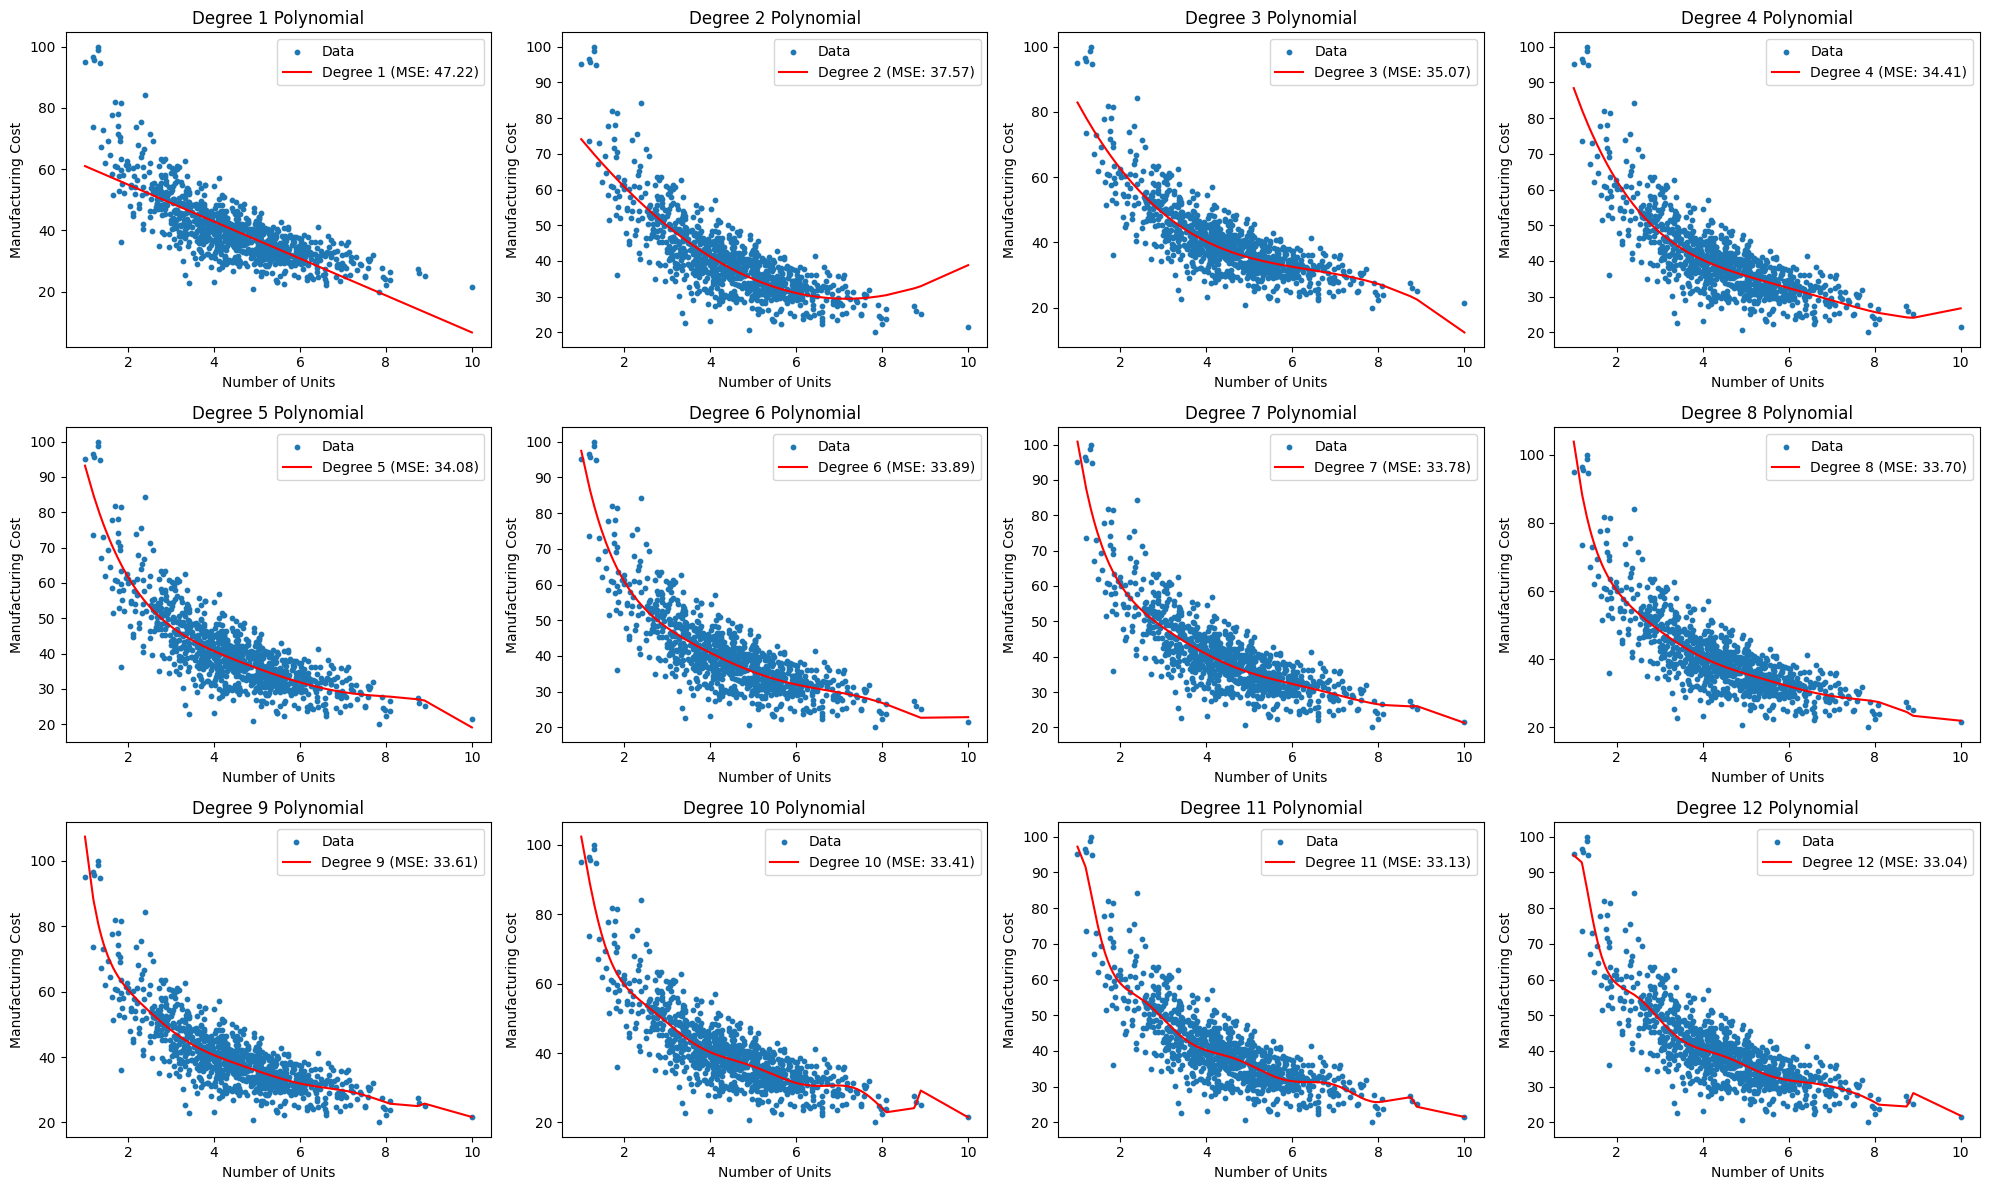

In [34]:
degrees = list(range(1, 13)) #membuat daftar derajat polinomial yang akan diuji dari 1 hingga 12


mse_values = [] #membuat list untuk menyimpan nilai MSE

plt.figure(figsize=(20, 12)) #membuat plot terpisah untuk masing-masing derajat polinomial

for i, degree in enumerate(degrees):

    polynomial_features = PolynomialFeatures(degree=degree) #membuat objek PolynomialFeatures

    x_poly = polynomial_features.fit_transform(x) #transformasi data menjadi polinomial

    model = LinearRegression()  #membuat model regresi linier dengan data polinomial
    model.fit(x_poly, y)

    y_pred = model.predict(x_poly) #prediksi dengan model yang telah dibuat

    mse = mean_squared_error(y, y_pred)     #menghitung Mean Squared Error (MSE)
    mse_values.append(mse)

    #plot hasil regresi polinomial
    plt.subplot(3, 4, i + 1)
    plt.scatter(x, y, s=10, label='Data')
    plt.plot(x, y_pred, color='r', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()

#mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')

plt.tight_layout()
plt.show()